In [2]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Review

In slides.

## New material

The midterm (in the demo example) is out of 25 points. The section average scores in the table are fictional and were chosen for the purposes of this problem.

In [3]:
scores = Table.read_table('scores_by_section.csv')
scores.show(5)

Section,Midterm
1,22
2,12
2,23
2,14
1,20


In [4]:
scores.group('Section').show(12)

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [5]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [6]:
section_3_average = scores.group('Section', np.average).column('Midterm average').item(2)

In [7]:
section_3_size = scores.group('Section').column('count').item(2)

We can simulate a random section using the `sample` Table method.

In [8]:
random_section = scores.sample(27, with_replacement=False)
random_section

Section,Midterm
10,19
9,23
8,24
9,11
4,19
1,25
9,12
11,0
12,19
10,7


In [9]:
np.average(random_section.column('Midterm'))

15.74074074074074

In [10]:
np.average(scores.sample(27, with_replacement=False).column('Midterm'))

14.222222222222221

- Null hypothesis: The average score of section 3 is no different from a random section of 27 students sampled from the class.
- Alternative: The average score of section 3 is lower than what we would expect from a random section of 27 students sampled from the class. There is something other than randomness causing the low average.


**Discussion Task [2 min]:** Create an array of 10000 test statistics that are simulated under the null hypothesis and assign them to the name `simulated_sample_averages` to help test these hypotheses.
- Write any functions that you need to. 
- The code below will make a histogram of the simulated test statistics with the observed test statistic superimposed once you've made the array correctly.

In [11]:
def one_sample_average():
    return np.average(scores.sample(27, with_replacement=False).column('Midterm'))

In [12]:
simulated_sample_averages = make_array()

for i in np.arange(10000):
    simulated_sample_averages = np.append(simulated_sample_averages, one_sample_average())

In [13]:
simulated_sample_averages

array([ 17.55555556,  16.48148148,  16.66666667, ...,  16.48148148,
        17.59259259,  15.55555556])

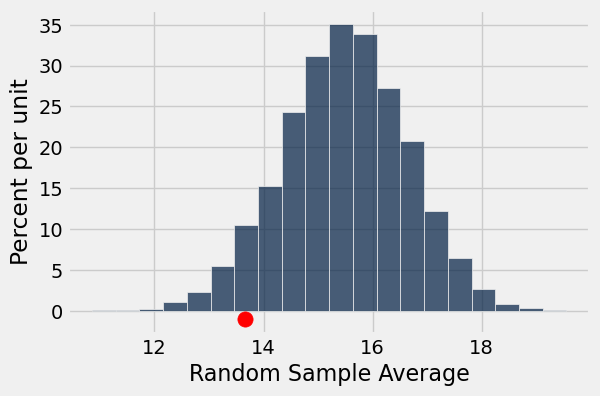

In [14]:
averages_tbl = Table().with_column('Random Sample Average', simulated_sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(section_3_average, -0.01, color='red', s=120);

**Discussion Question [1 min]:** Imagine you are the instructor for this class and are in charge of supervising the TAs who staff each of the 12 sections. How might you approach the TA of section 3 after seeing these results?


**STOP**

### In a close call, calculate the p-value!

**Task:** 
- Calculate the proportion of sample averages which are lower than the section 3 average which was observed.
- This is called the *p*-value.

In [15]:
simulated_sample_averages

array([ 17.55555556,  16.48148148,  16.66666667, ...,  16.48148148,
        17.59259259,  15.55555556])

In [16]:
section_3_average

13.666666666666666

In [17]:
simulated_sample_averages <= section_3_average

array([False, False, False, ..., False, False, False], dtype=bool)

In [18]:
np.count_nonzero(simulated_sample_averages <= section_3_average)

585

In [21]:
simulations = 10000

In [22]:
p_value = np.count_nonzero(simulated_sample_averages  <= section_3_average) / 10000
p_value

0.0585

**Task:** Demarcate:
- the area of the simulated distribution of test statistics lower than the section 3 average with a vertical line.
- the area covered by the lowest five percent of the simulated distribution of statistics.

In [23]:
sorted_averages = averages_tbl.sort(0).column(0)

In [24]:
sorted_averages

array([ 10.85185185,  11.03703704,  11.2962963 , ...,  19.33333333,
        19.48148148,  19.55555556])

In [31]:
five_percent_index = round(simulations* 0.05)
five_percent_index

500

In [32]:
five_percent_point = sorted_averages.item(five_percent_index)
five_percent_point

13.592592592592593

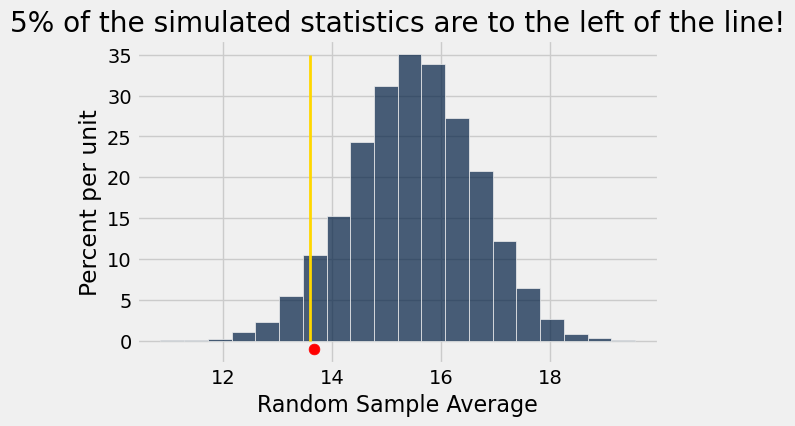

In [33]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('5% of the simulated statistics are to the left of the line!');
plots.scatter(section_3_average, -0.01, color='red', s=60);

Since smaller values are more consistent with the alternative, and larger ones are more consistent with the null:

- If the red dot is to the *left* of the gold line: *reject* null!
- If the red dot is to the **right** of the gold line: **retain** null!

**STOP**